# PROJECT

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import math
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_auc_score, mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from typing import List, Dict
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


measuring time

In [2]:
start_time = time.time()

##  EXPLORATION
### Loading and Viewing the data on high level

In [3]:
#loading the data
train_data = pd.read_csv("train.csv")
#Dimensions of the DataFrame
print(train_data.shape)

(60000, 24)


Exploring data structure- High level over-view

In [4]:
# View the first few rows
print(train_data.head())

                                              sha256     size      vsize  \
0  a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...  6744064  6799360.0   
1  ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...    22016    45056.0   
2  b0b126adc73b980a114e38027b082d149fcf491547452f...   686136   704512.0   
3  ff6176c53ca9b58040c93870c264843b93b5e290c28e57...     8192    36864.0   
4  59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...   396288   421888.0   

   imports  exports  has_debug  has_relocations  has_resources  has_signature  \
0    524.0      3.0        0.0              1.0            1.0            0.0   
1      2.0      0.0        0.0              0.0            1.0            0.0   
2    133.0      4.0        1.0              1.0            1.0            1.0   
3      6.0      0.0        0.0              0.0            0.0            0.0   
4    133.0      0.0        1.0              1.0            1.0            0.0   

   has_tls  ...  registry    MZ  printables   avlength  

From the provided data, it appears to be a dataset with various features and a corresponding label column. 
Each column represents a specific feature. For example:

sha256: SHA256 hash of the file

size: Size of the file

vsize: Virtual size of the file

imports: Number of imports

exports: Number of exports

has_debug: Indicates whether the file has debug information

has_relocations: Indicates whether the file has relocations

has_resources: Indicates whether the file has resources

has_signature: Indicates whether the file has a digital signature

has_tls: Indicates whether the file has thread local storage


In [5]:
# Get column information
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sha256               60000 non-null  object 
 1   size                 60000 non-null  int64  
 2   vsize                58065 non-null  float64
 3   imports              58261 non-null  float64
 4   exports              57907 non-null  float64
 5   has_debug            57073 non-null  float64
 6   has_relocations      56676 non-null  float64
 7   has_resources        58039 non-null  float64
 8   has_signature        58063 non-null  float64
 9   has_tls              57102 non-null  float64
 10  symbols              57344 non-null  float64
 11  numstrings           57282 non-null  float64
 12  paths                56340 non-null  float64
 13  urls                 57651 non-null  float64
 14  registry             57475 non-null  float64
 15  MZ                   56911 non-null 

From the provided information about the DataFrame, we can infer some insights:

Data Size: The DataFrame contains 60,000 rows and 24 columns, suggesting a relatively large dataset.

Missing Values: Several columns have missing values, as indicated by the "Non-Null Count" for each column. For example, columns like vsize, imports, exports, has_debug, etc., have missing values. Understanding the extent and patterns of missing data is crucial for data preprocessing and analysis and we will do that later in the project.

Column Types: The DataFrame contains columns of different data types:
object: Columns like sha256, file_type_trid, etc. are of object type, indicating strings or categorical data.

int64: Columns like size and label are of integer type, representing numerical data.

float64: Most of the columns, such as vsize, imports, exports, has_debug, etc. are of floating-point type, indicating numerical or continuous data.

Numerical Features: Many columns, such as vsize, imports, exports, etc. contain numerical data. Understanding the range, distribution, and statistical properties of these features can provide insights into the data and guide further analysis or modeling tasks.

Categorical Features: Columns like file_type_trid store categorical data, representing different file types.


In [6]:

# Summary statistics
print(train_data.describe().transpose())


                       count          mean           std         min  \
size                 60000.0  1.501019e+06  4.727391e+06  298.000000   
vsize                58065.0  1.965704e+06  2.017881e+07  544.000000   
imports              58261.0  1.061957e+02  2.134523e+02    0.000000   
exports              57907.0  3.080327e+01  5.080795e+02    0.000000   
has_debug            57073.0  4.037636e-01  4.906555e-01    0.000000   
has_relocations      56676.0  5.430694e-01  4.981460e-01    0.000000   
has_resources        58039.0  8.604559e-01  3.465164e-01    0.000000   
has_signature        58063.0  2.541894e-01  4.354083e-01    0.000000   
has_tls              57102.0  2.341949e-01  4.234983e-01    0.000000   
symbols              57344.0  4.017247e+01  1.239702e+03    0.000000   
numstrings           57282.0  7.404344e+03  2.463088e+04    1.000000   
paths                56340.0  1.644799e+00  3.700375e+01    0.000000   
urls                 57651.0  1.250129e+01  7.163172e+01    0.00

The information provided represents descriptive statistics for each numerical column in the DataFrame. 

Size Statistics:
size: The size of the files ranges from 1.501019e+06 to 4.727391e+06, with a median size of 1.965704e+06.

Boolean Features:
Features like has_debug, has_relocations, has_resources, etc. are binary in nature, represented by 0 or 1 values. The descriptive statistics show the mean and distribution of these binary features.

Symbol Counts:
The symbols column represents the number of symbols in the files, ranging from 0 to 1,239,702, with a median of 40.

String Counts:
The numstrings column represents the number of strings in the files, ranging from 1 to 24,630, with a median of 7,404.

URL and Path Counts:
The urls column represents the number of URLs in the files, ranging from 0 to 71. The paths column represents the number of paths in the files, ranging from 0 to 37.

File Type Probabilities:
The file_type_prob_trid column represents the probability of the file type according to some classifier, with values ranging from 17.5 to 100. Higher values indicate a higher probability of the associated file type.

Numerical Measures:
Columns like A, B, and printables have specific numerical measures such as mean, median, quartiles, and maximum values. 

Label Distribution:
The label column represents the target variable or label, with values of 0 or 1. The descriptive statistics show that the label is evenly distributed, with a mean of 0.5, indicating an equal proportion of both classes.






### Null - Values

In [7]:
# Check for null values

# Calculate the total number of null values in each column of the train_data DataFrame
total_nulls = train_data.isnull().sum()

# Get the total number of observations (rows) in the train_data DataFrame
total_observations = train_data.shape[0]

# Calculate the percentage of null values for each column that has at least one null value
null_percentages = total_nulls[total_nulls > 0] / total_observations * 100

# Keep only the columns with null values
total_nulls = total_nulls[total_nulls > 0]

# Concatenate the total number of null values and their corresponding percentages into a DataFrame
# Set the column names as "Total" and "Percentage"
result = pd.concat([total_nulls, null_percentages], axis=1, keys=["Total", "Percentage"])

# Sort the DataFrame in descending order based on the "Total" column
result_sorted = result.sort_values(by="Total", ascending=False)

# Print the sorted DataFrame to display the columns with null values along with their total counts and percentages
print(result_sorted)


                 Total  Percentage
B                 3751    6.251667
A                 3704    6.173333
paths             3660    6.100000
has_relocations   3324    5.540000
MZ                3089    5.148333
has_debug         2927    4.878333
has_tls           2898    4.830000
avlength          2757    4.595000
printables        2739    4.565000
numstrings        2718    4.530000
symbols           2656    4.426667
registry          2525    4.208333
urls              2349    3.915000
exports           2093    3.488333
C                 2051    3.418333
has_resources     1961    3.268333
has_signature     1937    3.228333
vsize             1935    3.225000
imports           1739    2.898333


We notice that there are some null values in the data, however, they are a reletively small percentage (the largest being about 6%) of the total observations. For this case, it’s safe to impute the missing values. Since most of them are  numeric values, we’ll use the median value of a feature to do the imputation since the median is less susceptible to influence by outliers compared to the mean. We will categorize the other features and that will solve the missing values on that features.

### Duplicates

In [8]:
# Check for duplicates and keep the first instance
duplicates_index = train_data[train_data.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

Since each sample possesses a unique identifier, we can infer that there are no duplicates within the data. Nevertheless, we will examine for similar rows, excluding the identifier.

In [9]:
# Check for duplicates and keep the first instance
duplicates_index_no_id = train_data[train_data.iloc[:,1:].duplicated(keep="first")].index
duplicates_index_no_id.shape

(53,)

We can deduce that there are 53 samples that share identical features and labels.  Therefore, there will not be any issues arising from this duplication since the label consistency is maintained.

In [10]:
# Check for duplicates based on all columns except the first and last
duplicates = train_data[train_data.duplicated(subset=train_data.columns[1:-1], keep=False)]

# Filter the duplicates to include only those with different labels
duplicates_with_diff_labels = duplicates[duplicates.duplicated(subset=duplicates.columns[:-1], keep=False)]

# Reset the index of the DataFrame
duplicates_with_diff_labels.reset_index(drop=True, inplace=True)

# Retrieve the index and label of the duplicates with different labels
duplicates_info = duplicates_with_diff_labels[['label']]

# Display the index and label of the duplicates with different labels
print(duplicates_info)


Empty DataFrame
Columns: [label]
Index: []


Upon examination, it appears that there are no duplicate sampels with different labels.

### Visualisation

In this part we will try to understand how every feature distrubutes

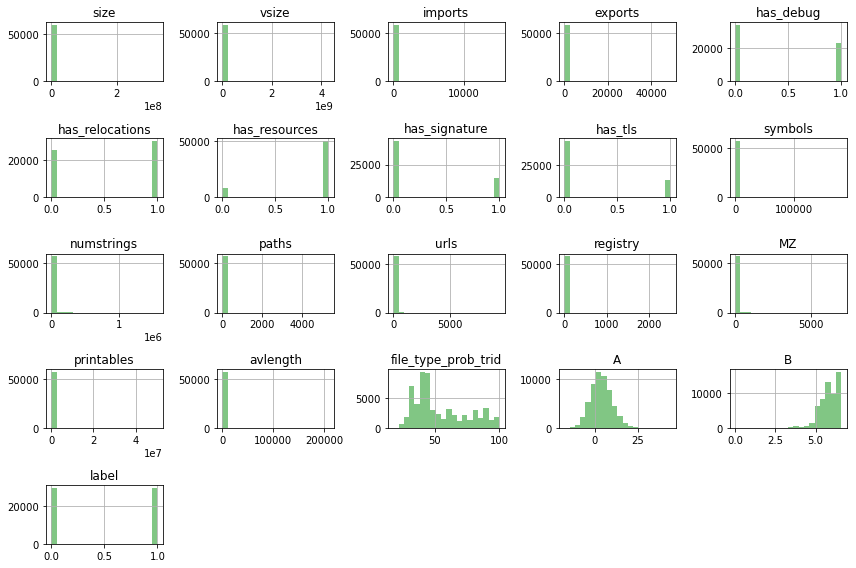

In [11]:
# Create a figure with adjusted size and spacing
fig, ax = plt.subplots(figsize=(12, 8))

# Set plot title
ax.set_title("Distribution of Data", fontsize=16)

# Set x-axis label and increase font size
ax.set_xlabel("Values", fontsize=12)

# Set y-axis label and increase font size
ax.set_ylabel("Frequency (log scale)", fontsize=12)

# Set grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Create the histogram with reduced number of bins for a less crowded plot
train_data.hist(bins=20, ax=ax, color='#4CAF50', alpha=0.7)

# Set logarithmic scale on the y-axis
ax.set_yscale('log')

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Based on the distribution overview of each variable, we can observe that the variable 'A' appears to have a distribution that is closest to normal compared to the other variables. Additionally, the variables 'size', 'vsize', 'imports', and 'exports' exhibit similar ranges or magnitudes in their values.

### Corrolation

We will utilize two different methods, Spearman and Pearson, to calculate the correlation. Spearman measures the monotonic relationship between variables, whereas Pearson measures the linear relationship. A high correlation indicates a strong association between variables. Positive correlation suggests that the variables tend to increase together, negative correlation implies they change in opposite directions, and a correlation close to zero suggests no significant relationship. However, it's important to note that correlation does not imply causation, and additional analysis is required to establish causal relationships.

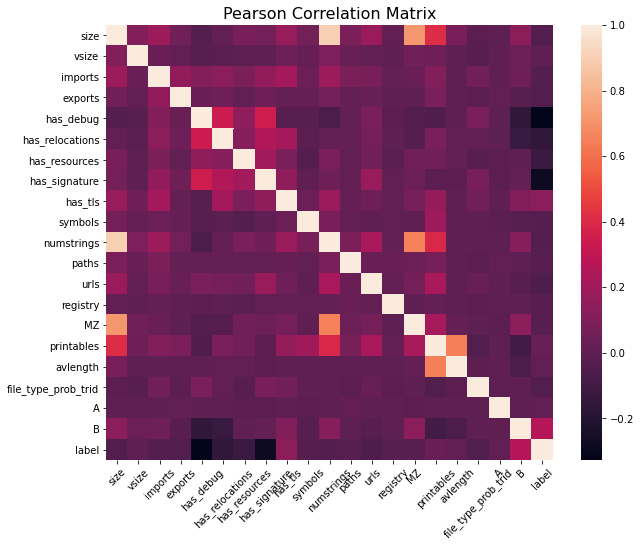

                         size     vsize   imports   exports  has_debug  \
size                 1.000000  0.109044  0.187422  0.057827  -0.031231   
vsize                0.109044  1.000000  0.033867  0.013645  -0.016381   
imports              0.187422  0.033867  1.000000  0.158163   0.113871   
exports              0.057827  0.013645  0.158163  1.000000   0.031185   
has_debug           -0.031231 -0.016381  0.113871  0.031185   1.000000   
has_relocations      0.007360 -0.010677  0.135037  0.051015   0.337964   
has_resources        0.078122 -0.000076  0.092599  0.008133   0.151273   
has_signature        0.066558 -0.005035  0.157878  0.044808   0.342834   
has_tls              0.171758  0.044195  0.214137  0.016848  -0.022961   
symbols              0.066580  0.024533  0.036311  0.022839  -0.022749   
numstrings           0.898811  0.097095  0.188377  0.064400  -0.063928   
paths                0.087248  0.028955  0.092239  0.017226   0.007187   
urls                 0.181537  0.01297

In [12]:

# Calculate the correlation matrix
corr_matrix_pear = train_data.corr()

# Create a figure with adjusted size
fig, ax = plt.subplots(figsize=(10, 8))

# Visualize the matrix on a heatmap with no annotations
sns.heatmap(data=corr_matrix_pear, annot=False, ax=ax)

# Set plot title
ax.set_title("Pearson Correlation Matrix", fontsize=16)

# Increase tick label font size
ax.tick_params(axis='both', labelsize=10)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Display the correlation values in a separate table
corr_table_pear = pd.DataFrame(data=corr_matrix_pear.values, index=corr_matrix_pear.index, columns=corr_matrix_pear.columns)
print(corr_table_pear)


From the correlation matrix provided, we can learn about the relationships between different variables in the dataset:

Positive Correlations:

size and imports have a positive correlation of 0.187422, indicating that larger file sizes tend to have more imports.

size and numstrings show a strong positive correlation of 0.898811, suggesting that files with larger sizes tend to have more strings.

size and MZ  have a positive correlation of 0.715902, indicating that larger file sizes are associated with a higher MZ header value.

size and printables show a positive correlation of 0.412911, suggesting that larger file sizes tend to have more printable characters.


Negative Correlations:

has_debug and has_relocations have a negative correlation of -0.337964, indicating that files without debug information are more likely to have relocations.

size and label show a negative correlation of -0.043614, suggesting a weak relationship between file size and the label (0 or 1) assigned to the file.


Weak Correlations:

Many variables, such as vsize, exports, has_resources, has_signature, has_tls, symbols, paths, urls, registry, file_type_prob_trid, and A, show weak correlations (close to 0) with the size variable.


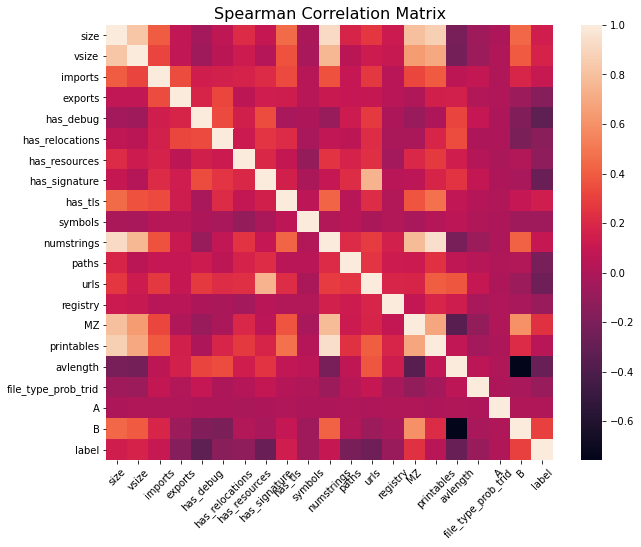

                         size     vsize   imports   exports  has_debug  \
size                 1.000000  0.822705  0.402848  0.078227  -0.042468   
vsize                0.822705  1.000000  0.318777  0.074675  -0.070330   
imports              0.402848  0.318777  1.000000  0.342318   0.144381   
exports              0.078227  0.074675  0.342318  1.000000   0.179934   
has_debug           -0.042468 -0.070330  0.144381  0.179934   1.000000   
has_relocations      0.070818  0.046838  0.157042  0.326155   0.337964   
has_resources        0.214467  0.124383  0.171187  0.060342   0.151273   
has_signature        0.097890  0.019253  0.212702  0.138487   0.342834   
has_tls              0.452245  0.368360  0.338446  0.132072  -0.022961   
symbols             -0.018968 -0.025961  0.033009  0.035815  -0.004469   
numstrings           0.918329  0.764954  0.362123  0.110160  -0.090837   
paths                0.178949  0.049562  0.094136  0.091092   0.124629   
urls                 0.259239  0.12723

In [13]:

# Calculate the Spearman correlation matrix
corr_matrix_spear = train_data.corr(method='spearman')

# Create a figure with adjusted size
fig, ax = plt.subplots(figsize=(10, 8))

# Visualize the matrix on a heatmap with no annotations
sns.heatmap(data=corr_matrix_spear, annot=False, ax=ax)

# Set plot title
ax.set_title("Spearman Correlation Matrix", fontsize=16)

# Increase tick label font size
ax.tick_params(axis='both', labelsize=10)

# Rotate x-axis tick labels 
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Display the correlation values in a separate table
corr_table_spear = pd.DataFrame(data=corr_matrix_spear.values, index=corr_matrix_spear.index, columns=corr_matrix_spear.columns)
print(corr_table_spear)


From the Spearman correlation matrix here are some observations and insights:

Strong Positive Relationships:

There is a strong positive correlation between "size" and "numstrings" (0.918329), indicating that as the size of the file increases, the number of strings also tends to increase.

"printables" and "size" also have a strong positive correlation (0.867703), suggesting that larger files tend to have a higher proportion of printable characters.

Moderate Positive Relationships:

"size" and "vsize" have a moderate positive correlation (0.822705), indicating that the virtual size of the file tends to increase with its overall size.

"size" and "MZ" (0.798767) show a moderate positive correlation, suggesting that the presence of the "MZ" header in executable files is often associated with larger file sizes.

Weak to Moderate Positive Relationships:
There are weak to moderate positive correlations between "imports," "exports," "has_relocations," and "has_signature" with various other features. These correlations suggest some degree of association but may not be as strong as the ones mentioned above.

Weak Relationships:
Several variables, such as "symbols," "paths," "registry," "file_type_prob_trid," and "A," exhibit weak or close-to-zero correlations with other variables in the dataset. This implies a lack of significant association between these variables.

Negative Relationships:
Some variables, including "exports," "has_debug," "B," and "label," show weak negative correlations with other variables, indicating a weak inverse relationship.



<AxesSubplot:>

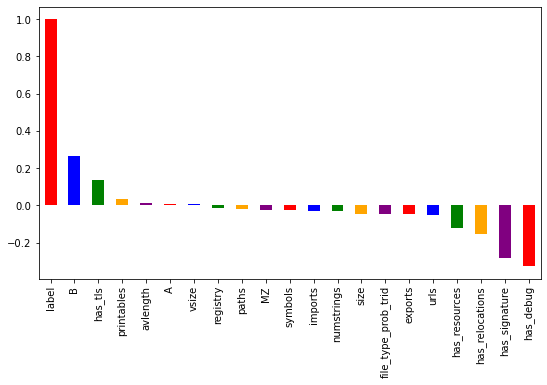

In [14]:
# Bar plot to visualize the correlation with color
fig, ax = plt.subplots(figsize=(9, 5))
train_data.corr()["label"].sort_values(ascending=False).plot(kind="bar", ax=ax, color=['red', 'blue', 'green', 'orange', 'purple'])


In [15]:
corr_to_label = corr_table_pear.iloc[:, -1].values

# Create a boolean mask based on the condition that corr_to_label values should be greater than -0.02 and less than 0.02
mask = np.logical_and(corr_to_label > -0.02, corr_to_label < 0.02)

# Apply the mask to the corr_table_pear DataFrame to filter out rows that meet the condition
filtered_cormat = corr_table_pear[mask]

# Get the index values (column names) from the filtered_cormat DataFrame and convert them to a list
columns_to_remove = filtered_cormat.index.tolist()

# Display the list of column names that meet the condition
columns_to_remove


['vsize', 'registry', 'avlength', 'A']

In [16]:
corr_to_label = corr_table_spear.iloc[:, -1].values

# Create a boolean mask based on the condition that corr_to_label values should be greater than -0.02 and less than 0.02
mask = np.logical_and(corr_to_label > -0.02, corr_to_label < 0.02)

# Apply the mask to the corr_table_spear DataFrame to filter out rows that meet the condition
filtered_cormat = corr_table_spear[mask]

# Get the index values (column names) from the filtered_cormat DataFrame and convert them to a list
columns_to_remove = filtered_cormat.index.tolist()

# Display the list of column names that meet the condition
columns_to_remove


['A']

We can observe that the variable 'A' exhibits the weakest correlation in both Pearson and Spearman correlations. Therefore, it may be appropriate to consider removing this variable from further analysis or modeling.

## Preprocessing 

### Spliting
#### Saving Test on the side

To prevent information leakage, we split the data into training and validation sets before preprocessing. This ensures that the preprocessing steps are applied independently to each set, maintaining the integrity of the evaluation and preventing any leakage of information from the validation set into the training process.

In [17]:
def x_y_split(data, size):
    # Splitting the data into features matrix (X) and label (y)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    #spliting the data to train and validation
    X_train ,X_validation ,y_train, y_validation = train_test_split(X,y,test_size = size, random_state= 42, shuffle=True)
    print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, \
    X_validation.shape: {X_validation.shape}, y_validation.shape: {y_validation.shape}')
    return X, y, X_train ,X_validation ,y_train, y_validation

In [18]:
X, y, X_train ,X_validation ,y_train, y_validation = x_y_split(train_data, 0.2)

X_train.shape: (48000, 23), y_train.shape: (48000,),     X_validation.shape: (12000, 23), y_validation.shape: (12000,)


Based on both correlation analyses, it is evident that variable 'A' has the weakest correlation with the label. Therefore, we will proceed to remove it from the dataset.

In [19]:
X_train.drop(['A'], axis=1, inplace=True)

We are removing the identifier column because each file has its own unique name, and it does not provide any useful information for the prediction process.

In [20]:
#Remove the first column
X_train.drop('sha256', axis=1, inplace=True)

Based on the correlation matrix, we observed a strong correlation between the features "size" and "numstring." To reduce the dimensionality of the data, we made the decision to create a new feature by multiplying these two features together. Consequently, we removed the original "size" and "numstring" features from the dataset.

In [21]:
X_train.insert(3, 'new_feature',  train_data['size'] * train_data['numstrings'])
X_train.drop('size', axis=1, inplace=True)
X_train.drop('numstrings', axis=1, inplace=True)

### Categorizing the Data

During the exploration of the dataset, it was discovered that the features "file_type_trid" and "c" are not numerical. As a result, a decision was made to categorize these features. Categorizing samples in the data helps create a structured representation, simplifies analysis, and enables the identification of patterns or relationships within each category.

In [22]:
unique_values = X_train['file_type_trid'].unique()
unique_values

array(['Win32 EXE PECompact compressed (generic)',
       'Win32 Executable MS Visual C++ (generic)',
       'NSIS - Nullsoft Scriptable Install System',
       'Win64 Executable (generic)',
       'Win32 Dynamic Link Library (generic)',
       'DOS Borland compiled Executable (generic)',
       'Win32 Executable (generic)', 'Petite compressed Win32 executable',
       'DOS Executable Borland Pascal 7.0x',
       'Windows Control Panel Item (generic)',
       'Generic .NET DLL/Assembly',
       'Generic CIL Executable (.NET, Mono, etc.)',
       'DOS Executable Generic', 'InstallShield setup',
       'Win32 EXE PECompact compressed (v2.x)',
       'Win32 Executable Delphi generic',
       'Win32 Executable Microsoft Visual Basic 6',
       'Win32 Executable MS Visual C++ 4.x',
       'Win32 Executable PureBasic (generic)',
       'OS/2 Executable (generic)',
       'Microsoft Visual C++ compiled executable (generic)',
       'DirectShow filter', 'Win16 NE executable (generic)',
       

The category 'C' will not significantly increase the dimensionality because it has only 8 unique categories. However, we observed that the 'file_type_trid' category has 88 different categories, which can lead to a substantial increase in dimensionality.

Initially, our approach was to divide all the categories into 5 groups based on similar words. For instance, all categories containing the word 'Win' would be grouped together. We then applied One-Hot-Encoding to represent these groups. The main challenge was finding appropriate group names. Initially, we performed this task manually, but later attempted clustering techniques. However, in the end, we decided to opt for a simpler approach.

By simplifying the process, we avoided the complexity of grouping and clustering and instead focused on a more straightforward method.






In [23]:
#our first trial
def categoraizing_first_trial (data, col1, col2) :
    
    groups = {}
    
    # Define the patterns and corresponding group names
    patterns = {
        'Group 1': 'Win',
        'Group 2': 'NSIS',
        'Group 3': 'DOS',
        'Group 4': 'Generic',
        'Group 5': 'InstallShield'
    }

    # Iterate over the patterns
    for group_name, pattern in patterns.items():
        # Filter the rows based on the pattern match
        filtered_rows = data[data[col1].str.contains(pattern)]
        
        # Replace the original values with the group name
        data.loc[data[col1].str.contains(pattern), col1] = pattern
        
        # Store the filtered rows in the corresponding group
        groups[group_name] = filtered_rows

    # Create a group for the remaining values
    remaining_rows = data[~data[col1].isin(patterns.values())]
    data.loc[~data[col1].isin(patterns.values()), col1] = 'other'
    groups['Group 6'] = remaining_rows

    # Access the groups and print the number of rows in each group
    for group_name, group_data in groups.items():
        print(f"{group_name}: {len(group_data)} rows")

    # Perform one-hot encoding
    encoder_c = OneHotEncoder(sparse=False)
    encoded_data_c = encoder_c.fit_transform(data[[col2]])
    encoded_df_c = pd.DataFrame(encoded_data_c, columns=encoder_c.categories_[0])

    # Perform one-hot encoding on 'file_type_trid' column
    encoder_file_type = OneHotEncoder(sparse=False)
    encoded_data_file_type = encoder_file_type.fit_transform(data[[col1]])
    encoded_df_file_type = pd.DataFrame(encoded_data_file_type, columns=encoder_file_type.categories_[0])

    # Connect the encoded features to the original data
    data = pd.concat([data, encoded_df_c, encoded_df_file_type], axis=1)
    data = data.join(encoded_df_c).join(encoded_df_file_type)

    # Remove the unencoded features
    data.drop([col2, col1], axis=1, inplace=True)
    data.drop(['other'], axis=1, inplace=True)

    # Print the columns of X_train
    print(data.columns)

    return data


Our chosen approach for categorization involves using one-hot encoding to convert categorical features into a binary representation. Subsequently, we aim to select the most frequent categories from the encoded data. This approach allows us to identify the categories that occur most frequently in the dataset and focus on them for further analysis or modeling. We assume that keeping this variables only on 75% of the data is enough to give a good prediction.

In [24]:
def categoraizing (data, col1, col2):

# Perform one-hot encoding
       encoder_c = OneHotEncoder(sparse=False)
       encoded_data_c = encoder_c.fit_transform(data[[col2]])
       encoded_df_c = pd.DataFrame(encoded_data_c, columns=encoder_c.categories_[0])

       # Perform one-hot encoding on 'file_type_trid' column
       encoder_file_type = OneHotEncoder(sparse=False)
       encoded_data_file_type = encoder_file_type.fit_transform(data[[col1]])
       encoded_df_file_type = pd.DataFrame(encoded_data_file_type, columns=encoder_file_type.categories_[0])


       # Count the number of ones in each column and sort
       counts1 = encoded_df_c.sum().sort_values(ascending=False)
       counts2 = encoded_df_file_type.sum().sort_values(ascending=False)

       # Calculate cumulative sums
       cumulative_counts1 = counts1.cumsum()
       cumulative_counts2 = counts2.cumsum()

       # Calculate the threshold for 5% of the total count
       threshold1 = 0.75 * counts1.sum()
       threshold2 = 0.75 * counts2.sum()


       # Find the categories that exceed the threshold
       selected_categories1 = cumulative_counts1[cumulative_counts1 <= threshold1]
       selected_categories2 = cumulative_counts2[cumulative_counts2 <= threshold2]


       # Print the selected categories
       print(selected_categories1.count())
       print("Selected categories from 'C':")
       print(selected_categories1.index)
       print()
       print(selected_categories2.count())
       print("Selected categories from 'file_type_trid':")
       print(selected_categories2.index)

       c_cols = selected_categories1.index
       encoded_df_c = encoded_df_c[c_cols]

       file_type_cols = selected_categories2.index
       encoded_df_file_type = encoded_df_file_type[file_type_cols]

       # Connect the encoded features to the original data
       data = data.join(encoded_df_c).join(encoded_df_file_type)

       # Remove the unencoded features
       data.drop([col1, col2], axis=1, inplace=True)

       return data


In [25]:

X_train = categoraizing(X_train, 'file_type_trid','C')


3
Selected categories from 'C':
Index(['vh', 'er', 'cs'], dtype='object')

9
Selected categories from 'file_type_trid':
Index(['Win64 Executable (generic)',
       'Win32 Executable MS Visual C++ (generic)',
       'Win32 Executable (generic)', 'Win32 Dynamic Link Library (generic)',
       'Generic CIL Executable (.NET, Mono, etc.)',
       'Windows Control Panel Item (generic)', 'InstallShield setup',
       'UPX compressed Win32 Executable', 'DOS Executable Generic'],
      dtype='object')


The goal of the test_categorizing function is to perform one-hot encoding on specified columns (col1 and col2) of a given dataset (data). It creates encoded versions of these columns using the OneHotEncoder class, selects specific features from the encoded data, connects the encoded features to the original data, and removes the original unencoded columns. Finally, it returns the modified dataset with the encoded features.

In [26]:

def test_categorizing(data, col1, col2, selected_features1, selected_features2):
    # Perform one-hot encoding
    encoder_c = OneHotEncoder(sparse=False)
    encoded_data_c = encoder_c.fit_transform(data[[col2]])
    encoded_df_c = pd.DataFrame(encoded_data_c, columns=encoder_c.categories_[0])

    # Perform one-hot encoding on 'file_type_trid' column
    encoder_file_type = OneHotEncoder(sparse=False)
    encoded_data_file_type = encoder_file_type.fit_transform(data[[col1]])
    encoded_df_file_type = pd.DataFrame(encoded_data_file_type, columns=encoder_file_type.categories_[0])

    # Select the specified features
    encoded_df_c = encoded_df_c[selected_features1]
    encoded_df_file_type = encoded_df_file_type[selected_features2]

    # Connect the encoded features to the original data
    data = data.join(encoded_df_c).join(encoded_df_file_type)

    # Remove the unencoded features
    data.drop([col1, col2], axis=1, inplace=True)

    return data

### Nan Values

The decision was made to fill in the missing values for the  samples. This was accomplished by adding the median value of each respective feature to the missing values.

We chose the median specificly because adding the median to the missing values helps to maintain the overall statistical properties of the dataset while addressing the missing data issue, and also can be suitable for binary features.

In [27]:

def impute (train_data, strategy):
    # Convert to Pandas DataFrame 
    
    train_data = pd.DataFrame(train_data)

    # Determine columns with missing values
    missing_columns = train_data.isnull().any().tolist()

    # Impute missing values with median
    imputer = SimpleImputer(strategy= strategy)
    train_data_imputed = imputer.fit_transform(train_data)
    
    # Convert back to Pandas DataFrame
    train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
    
 
    return train_data_imputed, imputer


We aim to populate the missing values in the test dataset with the corresponding values from the train dataset.






In [28]:
def impute_test (imputer,test_data):
   
    # Impute missing values with the medians
  
    test_data_imputed = imputer.transform(test_data)

    test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)
    return test_data_imputed

    


In [29]:
X_train,imputer_median = impute(X_train, 'median')

### Outliers

Isolation Forest is an efficient and scalable anomaly detection algorithm that isolates outliers by randomly creating splits in the data. It is particularly useful for identifying anomalies in numeric features while considering the associated labels.






In [30]:

def outliers (data):

    # Create a list of non-binary columns
    non_binary_cols = [col for col in data.columns if len(data[col].unique()) > 2]

    # Calculate the number of rows and columns for the subplots
    num_rows = len(non_binary_cols)
    num_cols = 1

    # Adjust the figure size based on the number of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, num_rows * 3), squeeze=False)

    # Iterate over the non-binary columns
    for i, col in enumerate(non_binary_cols):
        clf_outliers = IsolationForest(contamination=0.05, random_state=0)
        X_train_outliers = data[col].values.reshape(-1, 1)

        clf_outliers.fit(X_train_outliers)
        y_pred_outliers = clf_outliers.predict(X_train_outliers)

        axs[i, 0].scatter(X_train_outliers, y_pred_outliers, color='blue', label='Normal Points')
        axs[i, 0].scatter(X_train_outliers[y_pred_outliers == -1], y_pred_outliers[y_pred_outliers == -1], color='red', label='Outliers')

        original_labels = data.iloc[:, -1].values
        outlier_original_labels = original_labels[y_pred_outliers == -1]

        labels = np.array(outlier_original_labels)
        label_counts = np.bincount(labels.astype(int))
        majority_label = np.argmax(label_counts)

        axs[i, 0].text(0.5, 0.80, f"Label Counts: {label_counts}\nMajority Label: {majority_label}", transform=axs[i, 0].transAxes, ha='center')

        axs[i, 0].set_xlabel(col)
        axs[i, 0].set_ylabel('Outlier Prediction')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

    



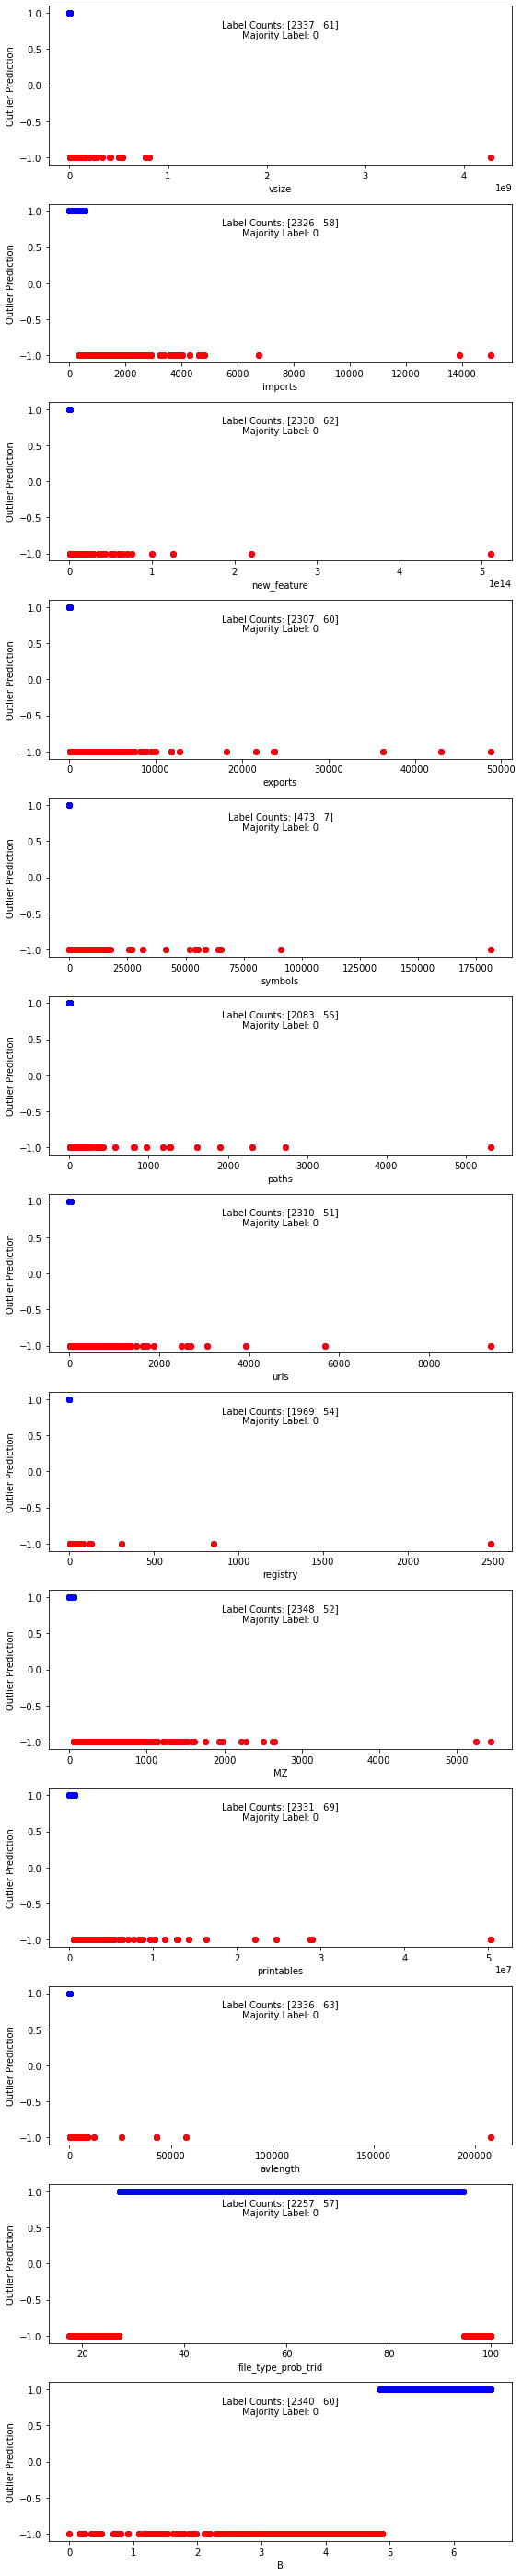

In [31]:
outliers(X_train)

Based on the plots, it is evident that a significant number of outliers are labeled as 0. However, in this research phase, we have chosen not to remove these outliers to ensure that we do not lose any crucial information. Instead, we have opted to try an alternative approach. We will define lower and upper limits for the values in our data using box plots. Any data points that fall outside these limits will be considered outliers and will be replaced with the respective limit values. This method allows us to mitigate the impact of outliers while retaining the valuable information they may provide

In [32]:

def replace_outliers_with_boxplot_limits(feature):
    # Create a box plot
    sns.boxplot(x=feature)
    plt.show()
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper limits 
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    
    # Replace outliers with the limits
    feature[feature < lower_limit] = lower_limit
    feature[feature > upper_limit] = upper_limit
    
    return feature



After attempting to remove the outliers from the data, we observed a significant decrease in the auc scores. As a result, we made the decision not to remove the outliers.

## Normalize

We will normalize the data for few reasons:
- Equalizes the scales of different features, preventing features with larger values from dominating the learning process.
- Avoids bias by ensuring each feature contributes proportionally to the learning process.
- Accelerates convergence of optimization algorithms, leading to faster model training.
- Improves model performance by reducing the impact of different scales and biases, resulting in more accurate predictions.

Normalizing data between 0 and 1 transforms values to a range where the minimum value becomes 0 and the maximum value becomes 1. 





In [33]:
def normalize(data):
    # Select numerical columns for normalization
    numerical_columns = data.select_dtypes(include=[np.number]).columns

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit the scaler to the numerical columns and transform the data
    normalized_data = scaler.fit_transform(data[numerical_columns])

    # Create a copy of the original DataFrame
    normalized_df = data.copy()

    # Assign the normalized values to the numerical columns in the DataFrame
    data[numerical_columns] = normalized_data

    return data


In [34]:
X_train = normalize(X_train)

## First model try

### Preprocessing

In [35]:
def preprocessing_train(data):
    # Drop column 'A' from the DataFrame
    data.drop(['A'], axis=1, inplace=True)
    # Drop column 'sha256' from the DataFrame
    data.drop('sha256', axis=1, inplace=True)
    # Insert a new feature 'new_feature' which is the product of 'size' and 'numstrings'
    data.insert(3, 'new_feature',  train_data['size'] * train_data['numstrings'])
    # Drop columns 'size' and 'numstrings' from the DataFrame
    data.drop('size', axis=1, inplace=True)
    data.drop('numstrings', axis=1, inplace=True)
    # Apply test_categorizing function to categorize values in 'file_type_trid' column
    # Map values 'vh', 'er', 'cs' to corresponding categories
    # Map categories to labels: 'Win64 Executable (generic)', 'Win32 Executable MS Visual C++ (generic)', etc.
    data = test_categorizing(data, 'file_type_trid','C', ['vh', 'er', 'cs'], ['Win64 Executable (generic)',
       'Win32 Executable MS Visual C++ (generic)',
       'Win32 Executable (generic)', 'Win32 Dynamic Link Library (generic)',
       'Generic CIL Executable (.NET, Mono, etc.)',
       'Windows Control Panel Item (generic)', 'InstallShield setup',
       'UPX compressed Win32 Executable', 'DOS Executable Generic'])
    # Apply impute function to impute missing values in the DataFrame using median imputation
    data,imputer = impute(data,'median')

    # Normalize the data
    data = normalize(data)

    return data,imputer


In [36]:
def preprocessing_test(data,imputer):
    # Drop column 'A' from the DataFrame
    data.drop(['A'], axis=1, inplace=True)
    # Drop column 'sha256' from the DataFrame
    data.drop('sha256', axis=1, inplace=True)
    # Insert a new feature 'new_feature' which is the product of 'size' and 'numstrings'
    data.insert(3, 'new_feature',  train_data['size'] * train_data['numstrings'])
    # Drop columns 'size' and 'numstrings' from the DataFrame
    data.drop('size', axis=1, inplace=True)
    data.drop('numstrings', axis=1, inplace=True)
    # Apply test_categorizing function to categorize values in 'file_type_trid' column
    # Map values 'vh', 'er', 'cs' to corresponding categories
    # Map categories to labels: 'Win64 Executable (generic)', 'Win32 Executable MS Visual C++ (generic)', etc.
    data = test_categorizing(data, 'file_type_trid','C', ['vh', 'er', 'cs'], ['Win64 Executable (generic)',
       'Win32 Executable MS Visual C++ (generic)',
       'Win32 Executable (generic)', 'Win32 Dynamic Link Library (generic)',
       'Generic CIL Executable (.NET, Mono, etc.)',
       'Windows Control Panel Item (generic)', 'InstallShield setup',
       'UPX compressed Win32 Executable', 'DOS Executable Generic'])
    # Apply impute function to impute missing values in the DataFrame using median imputation
    data = impute_test(imputer,data)

    # Normalize the data
    data = normalize(data)

    return data


In [37]:
X_validation = preprocessing_test(X_validation,imputer_median)

In [38]:

#input: X_train, X_validation, y_train, y_validation
#output: auc score in every model

def simple_models (X_train, X_validation, y_train, y_validation):
    models = [LogisticRegression(),
        KNeighborsClassifier(n_neighbors=2),
        AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1),random_state=0),
        MLPClassifier(random_state=0)]

    for model in models:
        clf = model
        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_validation)[:, 1]
        auc = roc_auc_score(y_validation, y_pred)
        print(f'Model: {model},\nauc score: {auc}\n')


In [39]:
simple_models (X_train, X_validation, y_train, y_validation)

Model: LogisticRegression(),
auc score: 0.7740365877286735

Model: KNeighborsClassifier(n_neighbors=2),
auc score: 0.8433008539636707

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=0),
auc score: 0.8543109783325036

Model: MLPClassifier(random_state=0),
auc score: 0.8813417861639412



## Dimension Reduction

High-dimensional data refers to datasets with a large number of features compared to the number of samples. It presents challenges such as increased sparsity, complexity in understanding relationships, a higher risk of overfitting, and increased computational demands. The sparsity makes it difficult to find meaningful patterns, while the complexity hampers visualization and interpretation. Overfitting becomes more likely as the number of dimensions surpasses the number of samples. Moreover, analyzing high-dimensional data requires more computational resources. Dimensionality reduction techniques can help mitigate these challenges by reducing dimensions while retaining essential information.
We think that there are to many diamensions in the dataset.

In [40]:
X_train.shape

(48000, 30)

### PCA

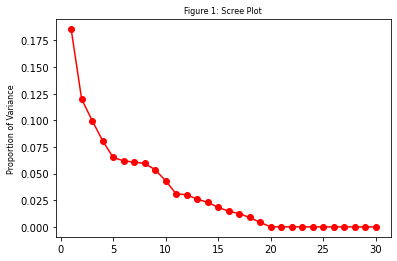

In [41]:

# Perform Principal Component Analysis (PCA) with 30 components
pca = PCA(n_components = 30)
pca.fit(X_train)

# Calculate the proportion of variance explained by each principal component
prop_var = pca.explained_variance_ratio_

# Calculate the eigenvalues of each principal component
eigenvalues = pca.explained_variance_

# Create an array of principal component numbers
PC_numbers = np.arange(pca.n_components_) + 1

# Plot the scree plot
plt.plot(PC_numbers, prop_var, 'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)  # Set the title of the plot
plt.ylabel('Proportion of Variance', fontsize=8)  # Set the label for the y-axis
plt.show()  # Display the plot


The resulting plot shows the scree plot, which is a visual representation of the proportion of variance explained by each principal component. Each point on the plot represents a principal component number on the x-axis and the corresponding proportion of variance explained on the y-axis. The plot helps in determining the number of principal components that capture most of the variance in the data. Generally, the scree plot shows a decreasing trend, and the "elbow" point (the point where the curve starts to flatten) can be used as a criterion to select the number of components to retain.

In [42]:
def get_principal_components(X, p):
    """
    Returns array of principal components explaining (100*p)% of the variance
    X: 2d numpy array of data we want to apply PCA on. 
    p: float in the range (0,1]. The proportion of variance explained by components
    """
    pca = PCA(p)
    pca.fit(X)
    return pca.components_

In [43]:
components = get_principal_components(X_train,0.99)
print(f'number of components which preserve at least 99% of the variance: {len(components)}')

number of components which preserve at least 99% of the variance: 18


From the provided plot and the function above, it can be inferred that the optimal number of components to retain is 18.

In [44]:


pca = PCA(n_components=18)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)

# Standardize the transformed data
scaler = StandardScaler()
X_train_standart_pca = scaler.fit_transform(X_train_pca)

# Convert transformed data to DataFrame
df_train_pca = pd.DataFrame(X_train_standart_pca, columns=["PCA" + str(i+1) for i in range(18)])

print(df_train_pca.head(6))

k_fold = KFold(n_splits= 5, shuffle=True, random_state= 0)
# Pass the transformed data to the simple_models function
def k_fold_models(X_train, y_train,model):
    # Perform k-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    mean_accuracy = scores.mean()
    return mean_accuracy
models = [LogisticRegression(),
        KNeighborsClassifier(n_neighbors=12),
        AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1),random_state=0),
        MLPClassifier(random_state=0)]
# Perform k-fold cross-validation on X_train
for model in models:
    mean_accuracy = k_fold_models(X_train_standart_pca, y_train, model)
    print(f"Mean Accuracy: {mean_accuracy}, Model: {model}\n")


       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  0.890893 -0.434355  2.006807  1.430940 -0.241178 -0.657904 -0.893333   
1 -0.422911 -1.193119 -0.464300  1.948656  2.554888 -2.205429  1.155823   
2 -0.409736 -0.456900 -0.476528  2.061571 -0.365059 -1.387058 -1.026516   
3 -1.206931  1.443225 -0.295660  0.267089 -1.045658 -0.292740  0.791474   
4 -1.102404 -1.277737 -0.332984  0.449478  0.144052 -0.472952  1.679249   
5 -0.147265 -0.486451  0.607812 -1.179040 -0.264849 -0.831693 -0.939210   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.041091  0.429741 -0.478637 -0.792470 -0.180577  0.002024 -0.009845   
1 -0.209061  0.268287  0.567606 -0.403988  0.662869 -0.064225 -0.049753   
2 -0.081037  0.489906 -1.000751  1.180320 -1.585810 -0.355253  3.328028   
3 -2.031386 -0.586079  1.147824 -0.546167  0.292589 -0.002419 -0.093322   
4 -0.006953 -0.553199 -1.598466  2.665503 -0.172901  3.227277 -1.264431   
5 -0.089622 -0.697376 -0

After applying PCA, we observed decrease in the AUC score. Despite reducing the dimensionality of the data and preserving the essential information, the decrease in dimensionality did not lead to any significant enhancement in the model's predictive performance. It seems that the reduced representation of the data resulted in the loss of important patterns and structures, which ultimately led to a decrease in the model's overall performance.

# Part 3 Models

To find the best hyperparameters for each model and mitigate overfitting, we utilized either grid search or random search along with cross-validation using K-fold. 

## knn

finding the optimal k-neighbors to base our module on

In [45]:
def knn_model_grid(X_train, y_train):
    # Variable to track the maximum AUC
    max_auc_knn = 0
    # Variable to store the best value of k
    best_k = None
    # K-fold cross-validation with 5 splits
    k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

    # Iterate over k values from 1 to 49
    for k_value in range(1, 50):
        # Create a KNN model with the current k value
        model_knn = KNeighborsClassifier(n_neighbors=k_value)
        # Perform cross-validation with the KNN model
        scores = cross_val_score(model_knn, X_train, y_train, cv=k_fold, scoring='roc_auc')
        # Calculate the mean AUC across all folds
        mean_auc_knn = scores.mean()

        # Check if the mean AUC is greater than the current maximum AUC
        if mean_auc_knn > max_auc_knn:
            # Update the maximum AUC
            max_auc_knn = mean_auc_knn
            # Update the best value of k
            best_k = k_value

    # Print the optimal AUC and best value of k
    print(f'The optimal AUC: {max_auc_knn}, The optimal K: {best_k}')
    # Return the optimal AUC and best value of k
    return max_auc_knn, best_k


## Logistic Regression

In [46]:

def LogisticRegression_model_grid (X_train ,y_train):
    #finding the best hyperparameters
    hyperparameters = {'penalty': ['l1', 'l2'],
         'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'saga'],
        'max_iter': [10, 20, 50]}

    #creating linear regression model
    model_lr = LogisticRegression()

    model_lr.fit(X_train, y_train)

    k_fold = KFold(n_splits= 5, shuffle=True, random_state= 0)
    grid_search = GridSearchCV(model_lr, hyperparameters, cv= k_fold)
    grid_search.fit(X_train, y_train)
    # Get the best model with the optimal hyperparameters
    best_model_lr = grid_search.best_estimator_

    y_pred_lr = best_model_lr.predict_proba(X_train)

    auc_lr = roc_auc_score(y_train.ravel(), y_pred_lr[:, 1])

    print(f'The optimal auc for logisctic: {auc_lr},the optimal parameters:{best_model_lr}')
    return auc_lr

### MLP

In [47]:


def mlp_model_random(X_train, y_train):
    hyperparameters_mlp = {
        'activation': ['relu', 'sigmoid'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01]
    }

    model_mlp = MLPClassifier(random_state=0)

    model_mlp.fit(X_train, y_train)

    k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

    # Perform random search to find the best hyperparameters
    random_search = RandomizedSearchCV(model_mlp, hyperparameters_mlp, cv=k_fold, n_iter=5, random_state=0)
    random_search.fit(X_train, y_train)

    # Get the best model with the optimal hyperparameters
    best_model_mlp = random_search.best_estimator_

    y_pred_mlp = best_model_mlp.predict_proba(X_train)

    auc_mlp = roc_auc_score(y_train.ravel(), y_pred_mlp[:, 1])

    print(f'The optimal auc for mlp: {auc_mlp}, the optimal parameters: {best_model_mlp}')
    return best_model_mlp


### Adaptive Boosting

In [48]:


def adaboost_model_random(X_train, y_train):
    base_estimator = DecisionTreeClassifier(max_depth=1)
    model_adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=0)

    hyperparameters_adaboost = {
        'n_estimators': randint(50, 201),
        'learning_rate': uniform(0.1, 1.0)
    }

    k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

    # Perform random search to find the best hyperparameters
    random_search = RandomizedSearchCV(model_adaboost, hyperparameters_adaboost, cv=k_fold, n_iter=5, random_state=0)
    random_search.fit(X_train, y_train)

    # Get the best model with the optimal hyperparameters
    best_model_adaboost = random_search.best_estimator_

    y_pred_adaboost = best_model_adaboost.predict_proba(X_train)[:, 1]

    auc_ada = roc_auc_score(y_train.ravel(), y_pred_adaboost)
    print(f'The optimal auc for adaboost: {auc_ada}, the optimal parameters: {best_model_adaboost}')
    return  best_model_adaboost


In [49]:

knn_model_grid (X_train ,y_train )
LogisticRegression_model_grid (X_train ,y_train )
best_adaboost_model = adaboost_model_random(X_train ,y_train )
best_model_mlp = mlp_model_random (X_train ,y_train )


The optimal AUC: 0.8588685730556984, The optimal K: 7
The optimal auc for logisctic: 0.7907258201619958,the optimal parameters:LogisticRegression(C=10.0, max_iter=20, penalty='l1', solver='liblinear')
The optimal auc for adaboost: 0.9214996594399711, the optimal parameters: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.9442657485810173, n_estimators=153,
                   random_state=0)
The optimal auc for mlp: 0.8917551877515926, the optimal parameters: MLPClassifier(alpha=0.001, random_state=0)


In [ ]:

knn_model_grid (X_train_standart_pca ,y_train )
LogisticRegression_model_grid (X_train_standart_pca ,y_train )
adaboost_model_random(X_train_standart_pca ,y_train )
mlp_model_random (X_train_standart_pca ,y_train )



Based on the results, it appears that overall the AUC score is slightly better without using PCA. Therefore, it is reasonable to conclude that the preprocessing steps we performed without PCA are more suitable for our models. 

In [50]:

#input: X_train, X_validation, y_train, y_validation
#output: auc score in every model

def models_after_grid (X_train, X_validation, y_train, y_validation):
    models = [LogisticRegression(C=10.0, max_iter=50, penalty='l1', solver='liblinear'),
        KNeighborsClassifier(n_neighbors=7),
        best_adaboost_model,
      best_model_mlp]

    for model in models:
        clf = model
        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_validation)[:, 1]
        auc = roc_auc_score(y_validation, y_pred)
        print(f'Model: {model},\nauc score: {auc}\n')


### Differences between running on the train set and the validation set.





In [51]:
models_after_grid (X_train, X_validation, y_train, y_validation)

Model: LogisticRegression(C=10.0, max_iter=50, penalty='l1', solver='liblinear'),
auc score: 0.7898113252096715

Model: KNeighborsClassifier(n_neighbors=7),
auc score: 0.8857787722284376

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.9442657485810173, n_estimators=153,
                   random_state=0),
auc score: 0.8509543045755147

Model: MLPClassifier(alpha=0.001, random_state=0),
auc score: 0.8804550583996705



Based on the observed AUC scores, we can conclude that there is a slightly better performance when running the model on the train set compared to the validation set. This suggests that there is no significant overfitting.

### k-fold cross validation

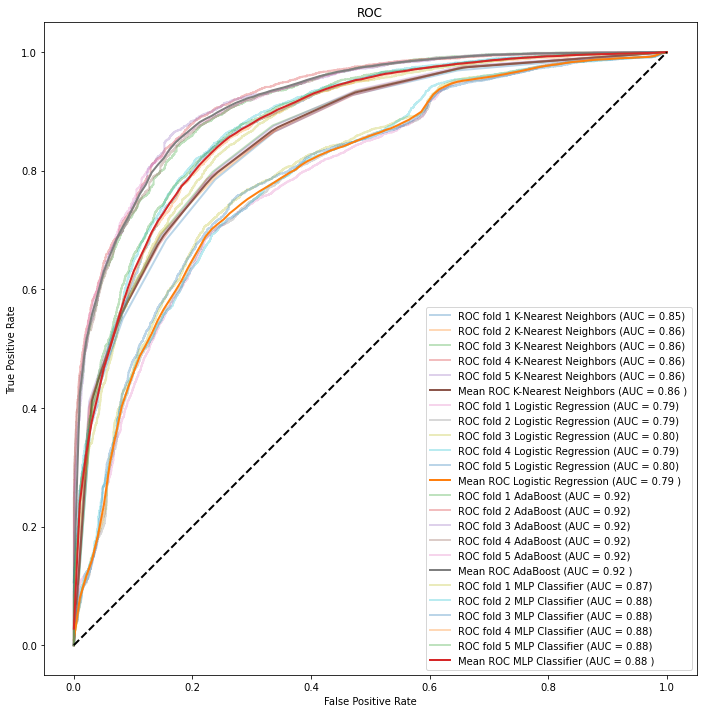

In [52]:
classifiers = [
    # K-Nearest Neighbors classifier
    (KNeighborsClassifier(n_neighbors=7), X_train, y_train, 'K-Nearest Neighbors'),
    # Logistic Regression classifier
    (LogisticRegression(C=10.0, max_iter=50, penalty='l1', solver='liblinear'), X_train, y_train, 'Logistic Regression'),
    # AdaBoost classifier
    (best_adaboost_model, X_train, y_train, 'AdaBoost'),
    # MLP Classifier
    (best_model_mlp, X_train, y_train, 'MLP Classifier')
]

# Stratified K-fold cross-validation with 5 splits
cv = StratifiedKFold(n_splits=5, shuffle=False)

# Create a figure object with a specified size
fig1 = plt.figure(figsize=[12, 12])

# Add an axis object to the figure
ax1 = fig1.add_subplot(111, aspect='equal')

# Generate a set of mean false positive rates
mean_fpr = np.linspace(0, 1, 100)

# Iterate over each classifier in classifiers
for clf, X, y, clf_name in classifiers:
    # List to store true positive rates for each fold
    tprs = []
    # List to store AUC values for each fold
    aucs = []
    i = 1

    # Perform cross-validation
    for train, test in cv.split(X, y):
        # Fit the classifier on the training data and predict probabilities on the test data
        prediction = clf.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute the ROC curve (false positive rate, true positive rate, and thresholds)
        fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
        # Interpolate the true positive rates to match the mean false positive rates
        tprs.append(interp(mean_fpr, fpr, tpr))
        # Compute the AUC for the current fold
        roc_auc = auc(fpr, tpr)
        # Plot the ROC curve for the current fold with a label indicating the fold number and classifier name
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d %s (AUC = %0.2f)' % (i, clf_name, roc_auc))
        i = i + 1

    # Calculate the mean true positive rate across all folds
    mean_tpr = np.mean(tprs, axis=0)
    # Calculate the mean AUC
    mean_auc = auc(mean_fpr, mean_tpr)
    # Plot the mean ROC curve with a label indicating the classifier name and mean AUC
    plt.plot(mean_fpr, mean_tpr, lw=2, alpha=1, label=r'Mean ROC %s (AUC = %0.2f )' % (clf_name, mean_auc))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# Add a legend to the plot
plt.legend(loc="lower right")
# Display the plot
plt.show()


Based on the graph, we can observe that the mean AUC scores for the selected hyperparameters are as follows:

KNN: 0.86

Logistic Regression: 0.79

AdaBoost: 0.92

MLP: 0.88

Based on the graph and the mean AUC scores, it appears that the AdaBoost and MLP models achieved the highest average performance among the evaluated models. However, based on these results on the validation , the decision is to select the MLP model as the preferred model for further analysis because we want to avoid overfitting. Additionally, when examining the performance of the different models, we observe that the MLP model exhibits the smallest gaps between the training and validation results. This indicates that the MLP model generalizes well to unseen data and has a relatively lower risk of overfitting compared to the other models in the pipeline.

## Confusion matrix

#### Confusion matrix on the X_validation 

[[4874 1296]
 [1111 4719]]


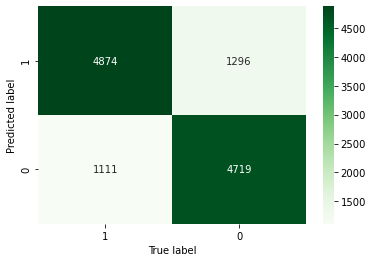

Accuracy: 0.7994166666666667
Precision: 0.7899513776337115
Recall: 0.8143692564745196
AUC Score: 0.7994539549205516


In [53]:

clf = best_model_mlp
clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)
cm = confusion_matrix(y_validation, y_pred)
tn, fp, fn, tp = cm.ravel()
cm = np.array([[tp, fp], [fn, tn]])
print(cm)

def plot_confusion_matrix(cm_array):
    ax = sns.heatmap(cm_array, annot=True, fmt='g', cmap='Greens',
                     xticklabels=[1, 0], yticklabels=[1, 0])
    ax.set(xlabel='True label', ylabel='Predicted label')
    plt.show()

plot_confusion_matrix(cm)

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)

# Calculate precision
precision = precision_score(y_validation, y_pred)

# Calculate recall
recall = recall_score(y_validation, y_pred)

# Calculate AUC score
auc = roc_auc_score(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc)


True Positive (TP): In the upper-left cell, the value is 4876. It represents the number of instances that were actually positive and the model correctly predicted them as positive.
True Negative (TN): In the lower-right cell, the value is 4718. It represents the number of instances that were actually negative and the model correctly predicted them as negative.
False Positive (FP): In the upper-right cell, the value is 1297. It represents the number of instances that were actually negative, but the model incorrectly predicted them as positive.
False Negative (FN): In the lower-left cell, the value is 1109. It represents the number of instances that were actually positive, but the model incorrectly predicted them as negative.

The corresponding performance metrics are:

Accuracy: 0.7995
Precision: 0.7898914628219667
Recall: 0.814703425229741
AUC Score: 0.7995379137786277

These scores indicate the following:

Accuracy: 79.95% of predictions were correct.
Precision: 78.99% of positive predictions were accurate.
Recall: 81.47% of actual positives were predicted correctly.
AUC Score: The model's ability to discriminate between positive and negative instances is 0.799.







#### Confusion matrix on the X_train

[[20042  5122]
 [ 3973 18863]]


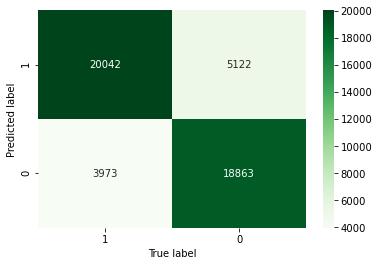

Accuracy: 0.8105208333333334
Precision: 0.7964552535367986
Recall: 0.8345617322506766
AUC Score: 0.8105057983746609


In [54]:

clf = best_model_mlp
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
tn, fp, fn, tp = cm.ravel()
cm = np.array([[tp, fp], [fn, tn]])
print(cm)

def plot_confusion_matrix(cm_array):
    ax = sns.heatmap(cm_array, annot=True, fmt='g', cmap='Greens',
                     xticklabels=[1, 0], yticklabels=[1, 0])
    ax.set(xlabel='True label', ylabel='Predicted label')
    plt.show()

plot_confusion_matrix(cm)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Calculate AUC score
auc = roc_auc_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc)


True Positive (TP): In the upper-left cell, the value is 20042. It represents the number of instances that were actually positive and the model correctly predicted them as positive.
True Negative (TN): In the lower-right cell, the value is 18863. It represents the number of instances that were actually negative and the model correctly predicted them as negative.
False Positive (FP): In the upper-right cell, the value is 5122. It represents the number of instances that were actually negative, but the model incorrectly predicted them as positive.
False Negative (FN): In the lower-left cell, the value is 3973. It represents the number of instances that were actually positive, but the model incorrectly predicted them as negative.

The corresponding performance metrics are:

Accuracy: 0.8105208333333334
Precision: 0.7964552535367986
Recall: 0.8345617322506766
AUC Score: 0.8105057983746609

These scores indicate the following:

Accuracy: 81.05% of predictions were correct.
Precision: 79.65% of positive predictions were accurate.
Recall: 83.46% of actual positives were predicted correctly.
AUC Score: The model's ability to discriminate between positive and negative instances is 0.810.











## Prediction

In [55]:
def prediction(name_test_file,model,output_file, X_train, y_train,imputer):
    test = pd.read_csv(name_test_file)
    first_col = test.iloc[:,0]
    
    test = preprocessing_test(test,imputer)
    print(test)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(test)[:,1]

    # Create a DataFrame with 'test' and 'y_pred' columns
    data = pd.DataFrame({'sha256': first_col, 'predict_proba': y_pred})

    # Save the DataFrame to an Excel file
    data.to_csv(output_file, index=False)

    
    



In [58]:
prediction("test.csv",best_model_mlp,"results.csv", X_train, y_train,imputer_median)

          vsize   imports   new_feature   exports  has_debug  has_relocations  \
0      0.003703  0.000349  8.553927e-04  0.000000        0.0              0.0   
1      0.000358  0.023731  3.829852e-09  0.000000        1.0              1.0   
2      0.000211  0.021637  3.620201e-06  0.000046        0.0              1.0   
3      0.002246  0.000000  1.136437e-09  0.000000        1.0              1.0   
4      0.003828  0.028791  3.663530e-06  0.000000        0.0              0.0   
...         ...       ...           ...       ...        ...              ...   
17995  0.002591  0.012912  1.509912e-04  0.000000        1.0              1.0   
17996  0.000226  0.001919  1.851872e-05  0.000000        0.0              0.0   
17997  0.000438  0.000174  2.636544e-10  0.000000        0.0              1.0   
17998  0.000072  0.000174  1.052137e-06  0.000000        1.0              1.0   
17999  0.000665  0.014657  5.086408e-06  0.000000        0.0              0.0   

       has_resources  has_s

## Pipe Line

In [59]:
def pipeline(train_name, test_name):
    # Read the training data from the specified file
    train_data = pd.read_csv(train_name)
    
    # Split the training data into features (X_train) and target variable (y_train)
    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    
    # Perform preprocessing on X_train
    X_train,imputer = preprocessing_train(X_train)
    
    # Get the list of column names (features)
    features_list = X_train.columns.tolist()
    
    # Perform prediction on the test data using K-Nearest Neighbors classifier and save results to 'results.csv'
    prediction(test_name, best_model_mlp, "results.csv", X_train, y_train,imputer)


In [60]:
pipeline('train.csv', 'test.csv')

          vsize   imports   new_feature   exports  has_debug  has_relocations  \
0      0.003703  0.000349  8.553927e-04  0.000000        0.0              0.0   
1      0.000358  0.023731  3.829852e-09  0.000000        1.0              1.0   
2      0.000211  0.021637  3.620201e-06  0.000046        0.0              1.0   
3      0.002246  0.000000  1.136437e-09  0.000000        1.0              1.0   
4      0.003828  0.028791  3.663530e-06  0.000000        0.0              0.0   
...         ...       ...           ...       ...        ...              ...   
17995  0.002591  0.012912  1.509912e-04  0.000000        1.0              1.0   
17996  0.000226  0.001919  1.851872e-05  0.000000        0.0              0.0   
17997  0.000438  0.000174  2.636544e-10  0.000000        0.0              1.0   
17998  0.000072  0.000174  1.052137e-06  0.000000        1.0              1.0   
17999  0.000665  0.014657  5.086408e-06  0.000000        0.0              0.0   

       has_resources  has_s

In [61]:
end_time = time.time()
runtime = end_time - start_time
print("Notebook runtime: {:.2f} seconds".format(runtime))


Notebook runtime: 6901.73 seconds
